# Softplus Layer

In [1]:
import numpy as np
from numpy_neural_network import Softplus

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
layer = Softplus(1)

In [4]:
def plot_func(x, y, xlim=4.0, ylim=4.0, ylabel='y'):
    plt.grid()
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='#707070', linestyle='-')
    plt.grid(b=True, which='minor', color='#A0A0A0', linestyle='-', alpha=0.2)
    plt.xlim(-xlim, xlim)
    plt.ylim(-ylim, ylim)
    plt.plot(x, y);
    plt.xlabel('x')
    plt.ylabel(ylabel)

In [5]:
d = 0.05
x = np.arange(-4.0, 4.0 + d, d)
g = np.arange(-4.0, 4.0 + d, d)

## Activation Function (forward pass)

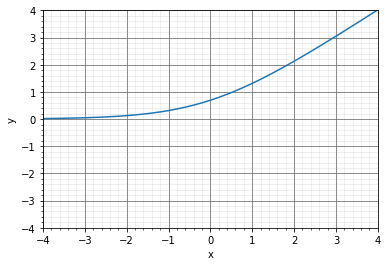

In [6]:
y = [layer.forward(np.array([xn])) for xn in x]

plot_func(x, y)

## Activation Function Derivative (backward pass)

In [7]:
def backward_pass(x, g):
    layer.forward(np.array([x]))
    return layer.backward(np.array([g]))[0]

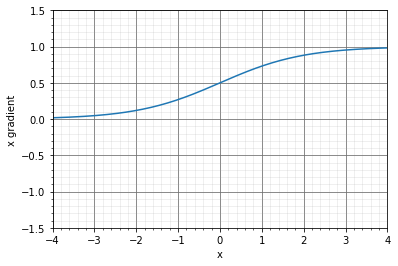

In [8]:
for n in np.arange(len(x)):
    y[n] = backward_pass(x[n], 1.0)  # backward pass at y gradient of 1.0

plot_func(x, y, ylim=1.5, ylabel='x gradient')

### 3D Activation Function Derivative ... plotted over input data (x) and layer output gradient (y gradient)

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
xmesh, gmesh = np.meshgrid(x, g)

xa = xmesh.ravel()
ga = gmesh.ravel()
za = np.zeros(len(xa))

for n in np.arange(len(za)):
   za[n] = backward_pass(xa[n], ga[n])

zmesh = za.reshape(xmesh.shape)

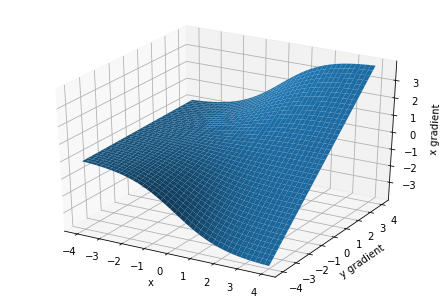

In [11]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xmesh, gmesh, zmesh);
ax.set_xlabel('x')
ax.set_ylabel('y gradient');
ax.set_zlabel('x gradient');